# Chapter 9 - Support Vector Machines

#### Student ID:B082040005

#### Name:高念慈

## Conceptual

### Q1:
#### We have seen that in $2$ dimensions, a linear decision boundary takes the form $f(X_1,X_2) = \beta_0+ \beta_1X_1 + \beta_2X_2 = 0$.  
#### We now investigate a non-linear decision boundary in $2$ dimensions.

(a) What is the decision boundary for the following graph? Write the answer in the equation form.

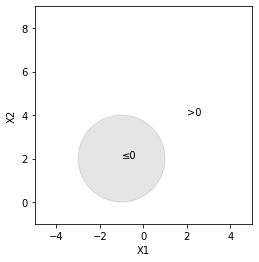

In [2]:
import numpy as np
import matplotlib.pyplot as plt

figure, ax = plt.subplots()
draw_circle = plt.Circle((-1, 2), 2, alpha=0.2, color='gray', fill=True)

ax.set(xlim=(-5, 5), ylim=(-1, 9), aspect='equal', xlabel='X1', ylabel='X2')
ax.text(-1,2,'≤0')
ax.text(2,4,'>0')
ax.add_artist(draw_circle)
plt.show()

> Ans:  
$f(X_1,X_2)= (1 + X_1)^2 + (2 − X_2)^2 - 4 = 0$. 

(b) Suppose that a classifier assigns an observation to the blue class if $f(X_1,X_2) > 0,$ and to the red class otherwise, e.g., the $(3, 8)$ is classified to blue. Which class is the observation $(0, 0)$ classified? What about $(−1, 1)$ and $(2, 2)$?

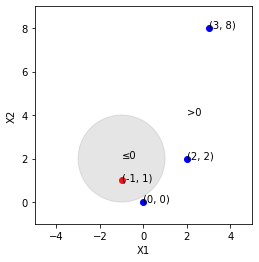

In [4]:
points = {(3,8): 'blue',
      (-1,1): 'red', # Change '_color_for_(X,X)_' to 'red' or 'blue'
      (2,2): 'blue', # Same as above
      (0,0): 'blue'} # Same as above

figure, ax = plt.subplots()
draw_circle = plt.Circle((-1, 2), 2, alpha=0.2, color='gray', fill=True)

ax.set(xlim=(-5, 5), ylim=(-1, 9), aspect='equal', xlabel='X1', ylabel='X2')
ax.text(-1,2,'≤0')
ax.text(2,4,'>0')
ax.add_artist(draw_circle)
for point in points:
    ax.scatter(*point, color=points[point])
    ax.text(*point, str(point))
plt.show()

(c) Trivially, the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$. Argue that the decision boundary is linear in terms of $X_1, X_1^2, X_2,$ and $X_2^2$.

> Ans:  
$\begin{align}
& (1 + X_1)^2 + (2 − X_2)^2 = 4 \\
\implies & 1 + 2X_1 + X_1^2 + 4 - 4X_2 + X_2^2 = 4 \\
\implies & 1 + 2X_1 - 4X_2 + X_1^2 + X_2^2 = 0
\end{align}$<br><br>
so it is linear in terms of $X_1, X_1^2, X_2,$ and $X_2^2$

### Q2: 
#### Here we explore the maximal margin classifier.


We are given $n = 7$ observations in $2$ dimensions. For each observation, there is an associated class label.
<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
    <thead>
        <tr>
            <th style="text-align:right;">Obs.</th>
            <th style="text-align:right;">X<sub>1</sub></th>
            <th style="text-align:right;">X<sub>2</sub></th>
            <th style="text-align:left;">Y</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:right;">1</td>
            <td style="text-align:right;">3</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:left;">Red</td>
        </tr>
        <tr>
            <td style="text-align:right;">2</td>
            <td style="text-align:right;">2</td>
            <td style="text-align:right;">2</td>
            <td style="text-align:left;">Red</td>
        </tr>
        <tr>
            <td style="text-align:right;">3</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:left;">Red</td>
        </tr>
        <tr>
            <td style="text-align:right;">4</td>
            <td style="text-align:right;">1</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:left;">Red</td>
        </tr>
        <tr>
            <td style="text-align:right;">5</td>
            <td style="text-align:right;">2</td>
            <td style="text-align:right;">1</td>
            <td style="text-align:left;">Blue</td>
        </tr>
        <tr>
            <td style="text-align:right;">6</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:right;">3</td>
            <td style="text-align:left;">Blue</td>
        </tr>
        <tr>
            <td style="text-align:right;">7</td>
            <td style="text-align:right;">4</td>
            <td style="text-align:right;">1</td>
            <td style="text-align:left;">Blue</td>
        </tr>
    </tbody>
</table>

(a) Sketch the observations with color.

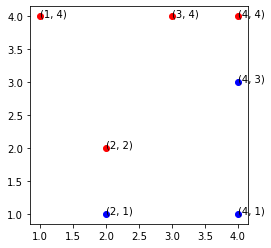

In [5]:
points = {(3,4): 'red',
      (2,2): 'red', # Change '_color_for_(X,X)_' to 'red' or 'blue'
      (4,4): 'red', # Same as above
      (1,4): 'red', # Same as above
      (2,1): 'blue', # Same as above
      (4,3): 'blue', # Same as above
      (4,1): 'blue',} # Same as above
line_X1 = np.linspace(0, 5, 1000)

figure, ax = plt.subplots()
ax.set_aspect(1)

for point in points:
    ax.scatter(*point, color=points[point])
    ax.text(*point, str(point))
plt.show()

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

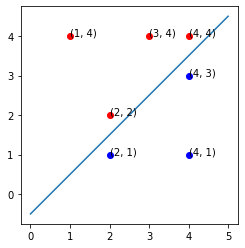

In [9]:
line_X2 = line_X1 -0.5 # __X2_of_the_hyperplane_(y_value_of_the_decision_boundary_line)__

figure, ax = plt.subplots()
ax.set_aspect(1)

ax.plot(line_X1, line_X2)
for point in points:
    ax.scatter(*point, color=points[point])
    ax.text(*point, str(point))
plt.show()

> Ans:  
$0.5 - X_1 + X_2 = 0$

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of 'Classify to *Red* if $\beta_0 + \beta_1X_1 + \beta_2X_2 > 0$, and classify to *Blue* otherwise.' Provide
the values for $\beta_0$, $\beta_1,$ and $\beta_2$.

> Ans:  
Classify to Red if $0.5 - X_1 + X_2 > 0$ , and classify to Blue otherwise.

(d) Indicate the margin for the maximal margin hyperplane.

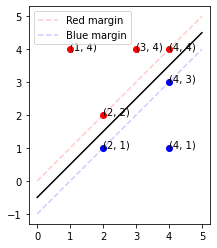

In [11]:
red_margin_X2 = line_X1 -0.5 +0.5 # __X2_of_the_red_margin_(y_value_of_the_red_maximal_margin_line)__
blue_margin_X2 = line_X1 -0.5 -0.5 # __X2_of_the_blue_margin_(y_value_of_the_blue_maximal_margin_line)__

figure, ax = plt.subplots()
ax.set_aspect(1)

ax.plot(line_X1, line_X2, color='k')
ax.plot(line_X1, red_margin_X2, alpha=0.2, color='r', linestyle='--', label='Red margin')
ax.plot(line_X1, blue_margin_X2, alpha=0.2, color='b', linestyle='--', label='Blue margin')
for point in points:
    ax.scatter(*point, color=points[point])
    ax.text(*point, str(point))
ax.legend()
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.

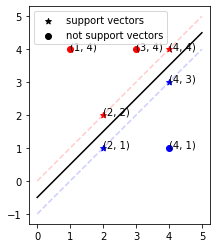

In [21]:
decision_function = lambda X: (-X[1] + X[0] -0.5 +0.5 == 0 or -X[1] + X[0] -0.5 -0.5 == 0)

# ___decision_function____
# The input of that decision function is X,
# and it return a boolean value that.
# If the point is support vector, the value should be 0.

marker = lambda point: {True:'*',False:'o'}[decision_function(point)]

figure, ax = plt.subplots()
ax.set_aspect(1)

ax.plot(line_X1, line_X2, color='k')
ax.plot(line_X1, red_margin_X2, alpha=0.2, color='r', linestyle='--')
ax.plot(line_X1, blue_margin_X2, alpha=0.2, color='b', linestyle='--')

for point in points:
    ax.scatter(*point, color=points[point], marker=marker(point))
    ax.text(*point, str(point))
ax.scatter(None,None, color='k', marker='*', label='support vectors')
ax.scatter(None,None, color='k', marker='o', label='not support vectors')
ax.legend()
plt.show()

補充：What `lambda` do:

In [9]:
add = lambda first, second: first + second
add(1, 2)

3

### Q3:  
#### We will now fit a support vector classifier using following data.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

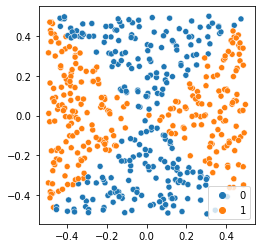

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(500, 2) - 0.5
y = 1 * (X[:,0]**2 - X[:,1]**2 > 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.75, random_state = 42)

figure, ax = plt.subplots()
ax.set(aspect='equal')
sns.scatterplot(*X.T, hue=y)

(b) Fit a support vector classifier to the data with linear kernel using $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

```python
# Plot classifiers
# Source: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)
```

Training score is  0.576
Testing Score is  0.544


(-0.5, 0.5)

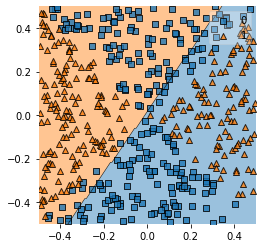

In [35]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# _______SVC_with_linear_kernel_______
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

print('Training score is ', svc.score(X_train, y_train))
print('Testing Score is ', svc.score(X_test, y_test))

figure, ax = plt.subplots()
ax.set(aspect='equal')

# _______plot________
plot_decision_regions(X, y, clf=svc)

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

(c) Fit a support vector classifier to the data with order $2$ polynomial kernel using $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Training score is  0.968
Testing Score is  0.9573333333333334


(-0.5, 0.5)

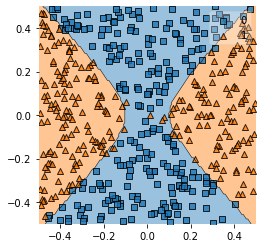

In [36]:
# _______SVC_with_poly_kernel_and_degree_of_2_______
svc = svc = SVC(kernel='poly', degree=2)
svc.fit(X_train,y_train)

print('Training score is ', svc.score(X_train, y_train))
print('Testing Score is ', svc.score(X_test, y_test))

figure, ax = plt.subplots()
ax.set(aspect='equal')

# _______plot________
plot_decision_regions(X, y, clf=svc)

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

(c) Fit a support vector classifier to the data with radial basis function kernel using $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Training score is  0.944
Testing Score is  0.8986666666666666


(-0.5, 0.5)

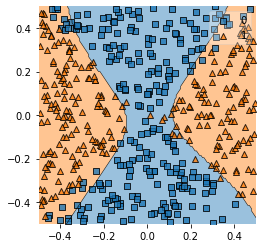

In [37]:
# _______SVC_with_rbf_______
svc = SVC(kernel='rbf', random_state=1)
svc.fit(X_train,y_train)

print('Training score is ', svc.score(X_train, y_train))
print('Testing Score is ', svc.score(X_test, y_test))

figure, ax = plt.subplots()
ax.set(aspect='equal')

# _______plot________
plot_decision_regions(X, y, clf=svc)

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

---

